In [2]:
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import physical_constants as pc
from gaussxw import gaussxwab, gaussxw
from timeit import default_timer as timer
import scipy.integrate as integrate 

# TP1 : Parcours des protons dans la matière

## 1.

   \cite{newhauser2015physics} nous informe que l'énergie cinétique des protons utilisés en protonthérapie varie entre 11 et 220 MeV, énergies correspondant à des distances de pénétration respectives de 1mm et 30 cm. Cette dernière étant la plus creuse que nous pouvons atteindre, on en déduit que l'énergie maximale typiquement utilisée est 220 MeV. Malgré le fait que l'énergie maximale typique est de 220 MeV, \cite{newhauser2015physics} mentionne aussi qu'elle peut atteindre 250 MeV dans certains cas.

### Relation entre le facteur de Lorentz $\gamma$ et l'énergie du proton $T$
l'énergie totale d'un proton est la somme de son énergie de masse au repos et de son énergie cinétique tel que,

\begin{align}
E = m_p c^2 + T
\end{align}

Par contre, l'énergie totale d'un proton en mouvement est aussi éagale à $\gamma m_p c^2$. On peut ainsi écrire, 

\begin{align}
E = \gamma m_p c^2 &= m_p c^2 + T\\
\Rightarrow\ T &=  m_p c^2 (\gamma - 1)
\end{align}

Bref, en considérant la masse du proton en électron-Volts, on peut réécrire l'énergie cinétique $T$ comme,

\begin{align}
T =  m_p (\gamma - 1)\ \ [eV]
\end{align}

 
### Relation entre le facteur de Lorentz $\gamma$ et la vitesse réduite $\beta$  

Sachant que $\gamma$ et $\beta$ sont définit comme,

\begin{align}
\gamma = \frac{1}{\sqrt{1-v^2/c^2}}, \ \ \beta = \frac{v}{c}
\end{align}

leur relation s'exprime comme

\begin{align}
\Rightarrow\ \gamma = \frac{1}{\sqrt{1-\beta^2}}, \ \ \beta = \sqrt{\frac{\gamma^2 - 1}{\gamma^2}}
\end{align}

## 2. 
Dimensionnellement, la densité électronique s'exprime comme le nombre d'électrons contenu par unité de volume, i.e. 

\begin{align}
n_e = \left[\frac{\text{Nombre d'électrons}}{cm^3}\right]
\end{align}

La masse atomique est égale au nombre de nucléons présents dans l'atome. Par exemple, la masse molaire de l'eau se calcule comme suit,

\begin{align}
M_{H_2 O} = 2\times M_H + M_O = 2\times 1 + 16 = 18\ g\cdot mol^{-1}
\end{align}

Ainsi, la masse atomique d'une molécule s'exprime comme la masse de chacun de ses atomes, i.e.

\begin{align}
M = \sum_{i=1}^{k} c_i M_i,
\end{align}

où $k$ est le nombre d'atomes, $M_i$ leur masse atomique et $c_i$, le nombre d'atome du même type. De plus, le nombre d'électron présent dans une molécule est égal au nombre total de protons, 

\begin{align}
\frac{Nombre\ d'électron}{molécule} = \sum_{i=1}^{k} c_i Z_i
\end{align}

Bref, par analyse dimensionelle, on peut exprimer la densité électronique comme:

\begin{align}
n_e &\doteq \left[\frac{Nombre\ de\ molécule}{mol}\right]\cdot\left[\frac{mol}{g}\right]\cdot\left[\frac{Nombre\ d'électron}{molécule}\right]\cdot\left[\frac{g}{cm^3}\right] \\
\Rightarrow\ n_e &= N_a \rho \frac{\sum_{i=1}^{k}c_i Z_i}{\sum_{i=1}^{k}c_i M_i} \label{dens}
\end{align}

On a ainsi que, pour l'eau, avec un nombre d'électrons de 10, un nombre de nucléons de 18 et une densité de 1 $g\;cm{-3}$, la densité électronique telle que

\begin{align}
n_e{_{H_2 O}} = N_a\cdot (1)\cdot \frac{10}{18} = \frac{5}{9}N_a\ \ [g\;cm^{-2}]
\end{align}

Passons maintenant à l'os cortical. Les données fournies par le NIST [METTRE RÉFÉRENCE], ne nous informent pas directement sur le nombre d'atome $c_i$ présent dans la molécule, mais plutôt le ratio de masse entre l'atome et la molécule appelé la fraction par poids ($F_{pp}$). On peut obtenir $c_i$ en inversant la définition de la $F_{pp}$, 

\begin{align}
F_{pp_i} = \frac{c_i M_i}{M_{tot}} \Rightarrow\ c_i = \frac{F_{pp_i} M_{tot}}{M_i}
\end{align}

En substituant cette définition de $c_i$ dans \eqref{dens}, on obtient l'expression suivante pour la densité électronique,

\begin{align}
n_e = N_a \rho \sum_{i=1}^{n} \frac{F_{pp_i} Z_i}{M_i}
\end{align}

Avec les données fournies par le NIST [REF], les masses atomiques des atomes d'intérêt prises sur le tableau périodique des éléments [REF] et la densité de l'os cortical de 1,85 $g/cm^3$, on obtient que la densité électronique de l'os cortical est,

\begin{align}
n_e{_{cort}} \approx 0,96438 N_a\ \ [g\;cm^{-2}]
\end{align}

Comme la gamme d'énergie typique utilisée en proton thérapie va de 11 MeV à 220 MeV, il est légitime de négliger les termes de correction du pouvoir d'arrêt collisionnel.

\begin{align}
S_{col}(T) = 2\pi r_e^2 m_e c^2 n_e \frac{1}{\beta^2}\left[\ln\left(\frac{2 m_e c^2 \beta^2 \gamma^2 T_e^{max}}{I^2}\right) - 2\beta^2\right]
\end{align}

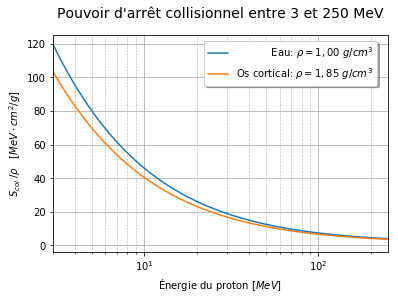

In [16]:
%matplotlib inline

# Définition des paramètres utilisés dans les calculs
r_e = pc['classical electron radius'][0] * 100  # Conversion de m à cm
N_a = pc['Avogadro constant'][0]

n_e_eau = 5*N_a/9
n_e_cort = 0.96438*N_a

I_eau = 75e-6
I_cort = 106.4e-6 
 
rho_cort = 1.85


def get_gamma(T, m_p=938.272):
    return T/m_p + 1

def get_beta(gamma):
    return np.sqrt((gamma**2 - 1)/gamma**2)

def get_Te_max(gamma, m_e=0.511, m_p=938.272):
    return (2*m_e*(gamma**2 - 1)/(1 + 2*gamma*m_e/m_p + (m_e/m_p)**2))

def get_s_col(r_e, n_e, T, I, m_e=0.511):
    
    """ Retourne le pouvoir d'arrêt collisonnel d'un matériau
    
    :params:---------------Description---------------: Unités : type :
           
        r_e: Rayon électronique                          cm      float
        n_e: Densité électronique du matériau          cm^{-3}
       beta: Facteur de vitesse réduite                  -
      gamma: Facteur de Lorentz                          -
          T: Énergie du proton                           MeV
     Te_max: Énergie maximale transférable p+ -> e-      MeV
          I: Énergie moyenne d'excitation du matériau    MeV
        m_e: Masse de l'électron                         MeV
    """
    
    gamma = get_gamma(T)
    beta = get_beta(gamma)
    Te_max = get_Te_max(gamma)
    
    return 2*np.pi*r_e**2*m_e*n_e*beta**(-2)*(np.log((2*m_e*beta**2*gamma**2*Te_max)/(I**2)) - 2*beta**2)

T = np.linspace(3, 10000, 100000)

s_col_eau = get_s_col(r_e, n_e_eau, T, I_eau)

s_col_cort = get_s_col(r_e, n_e_cort, T, I_cort)

p_col_cort = s_col_cort/rho_cort

ax = plt.subplot(111)

plt.plot(T, s_col_eau, label=r"           Eau: $\rho = 1,00\ g/cm^3$")
plt.plot(T, p_col_cort, label=r"Os cortical: $\rho = 1,85\ g/cm^3$")
plt.xscale('log')
plt.grid('True', which='Major')
plt.grid('True', which='Minor', ls='--', linewidth=0.6)
plt.xlabel(r'Énergie du proton $[MeV]$')
plt.ylabel(r"$S_{col}\;/\rho\quad[MeV\cdot cm^2/g]$")
plt.xlim([3,250])
plt.title("Pouvoir d'arrêt collisionnel entre 3 et 250 MeV", y=1.05, fontsize=14)
ax.legend(bbox_to_anchor=(0.45, 0.97), loc=2, borderaxespad=0., fancybox=True, shadow=True)
plt.show()

Avec la figure ci-haut, on remarque que plus l'énergie du proton augmente, plus l'approximation de l'os cortical comme étant de l'eau est valide à cause de la diminution de l'écart de pouvoir d'arrêt collisionnel, celui-ci passant d'environ $20\ MeV\cdot cm^2/g$ à moins de $1\ MeV\cdot cm^2/g$.

## 3.

l'approximation CSDA considère qu'un proton pénétrant la matière subit une décélération continue tout au long de son parcours. Suite à cette décélération, le proton se sera forcément arrêté à une distance que l'on appelle la portée par CSDA ($R_{CSDA}$). Cette portée s'exprime mathématiquement comme, 

\begin{align}
R_{CSDA} = \int_0^{T_i} \frac{dT'}{\frac{S_{col}}{\rho}} \label{porte}
\end{align}

Mais quelles sont les dimensions de la portée $R_{CSDA}$ ? Pour le trouver, procédons à l'analyse dimensionnelle du côté droit de (\ref{porte}). D'abord, 

\begin{align}
\frac{S_{col}}{\rho} = -\left(\frac{dT}{\rho dx}\right) \doteq \left[J(kg\;m^{-3})^{-1}m\right] = \left[J\;kg^{-1}m^2\right]
\end{align}

l'intégrande de (\ref{porte}) a donc des unités de,

\begin{align}
\frac{dT'}{\frac{S_{col}}{\rho}} &\doteq \left[J(J\;kg^{-1}m^2)^{-1}\right] = \left[kg\;m^{-2}\right]\\
R_{CSDA} &\doteq \left[kg\;m^{-2}\right]
\end{align}

Donc, si on cherche à avoir la portée en mètres dans un matériau quelconque, comme l'eau par exemple, il nous faudra diviser $R_{CSDA}$ par la densité de ce dernier, i.e.
\begin{align}
\frac{R_{CSDA}}{\rho} \doteq \left[m\right]
\end{align}

Bref, comme les valeurs de $\frac{S_{col}}{\rho}$ sont souvent fournies dans des tables de données, la portée des protons dans la matière est d'abord définie de façon générale par (\ref{porte}). On peut ensuite obtenir une portée plus "\textit{intuitive}" du proton en divisant par la densité de la matière d'intérêt.

## 4. 

Une particule traversant la matière est soumises à de nombreuses forces. Elle interagira non seulement avec les noyaux atomiques présent dans le matériau en question, mais aussi avec les électrons et si son énergie est assez grande, le rayonnement de freinage entrera en jeu.  Dans notre cas, on approxime la perte d'énergie du proton comme étant linéaire tout au long de son parcours à travers la matière et étant seulement causée par les collisions avec les électrons. Cette approximation est elle juste ? C'est ce que nous allons voir en comparant notre résultat pour le pouvoir d'arrêt collisionnel avec le pouvoir d'arrêt total obtenu des données du PSTAR.


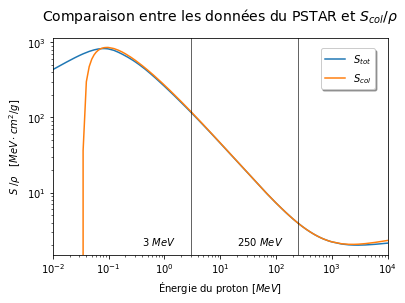

In [19]:
%matplotlib inline

data = np.loadtxt('S_tot_pstar.txt')

T_pstar = data[:, 0]
s_tot = data[:, 1]

s_col_eau = get_s_col(r_e, n_e_eau, T_pstar, I_eau)

ax = plt.subplot(111)
plt.plot(T_pstar, s_tot, label=r"$S_{tot}$")
plt.plot(T_pstar, s_col_eau, label=r"$S_{col}\quad$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Énergie du proton $[MeV]$')
plt.ylabel(r"$S\;/\rho\quad[MeV\cdot cm^2/g]$")
plt.axvline(3, c='k', linewidth=0.6)
plt.axvline(250, c='k', linewidth=0.6)
plt.text(0.4, 2, r'$ 3\ MeV$')
plt.text(20, 2, r'$ 250\ MeV$')
plt.xlim([1e-2, 1e4])
ax.legend(bbox_to_anchor=(0.8, 0.95), loc=2, borderaxespad=0., fancybox=True, shadow=True)
plt.title(r"Comparaison entre les données du PSTAR et $S_{col}/\rho$", y=1.05, fontsize=14)
plt.show()

In [14]:
def get_rms(data1, data2):
    rms = np.sqrt(np.mean((data1-data2)**2))
    return rms
i_small, i_3, i_250, i_1000 = np.where(T_pstar == 1e-1)[0][0], np.where(T_pstar == 3)[0][0],\
                              np.where(T_pstar == 250)[0][0], np.where(T_pstar == 10000)[0][0]

rms_min_small = get_rms(s_tot[:i_small+1], s_col_eau[:i_small+1])
rms_min_3 = get_rms(s_tot[:i_3+1], s_col_eau[:i_3+1]  )
rms_3_250 = get_rms(s_tot[i_3:i_250+1], s_col_eau[i_3:i_250+1])
rms_250_1000 = get_rms(s_tot[i_250:i_1000+1], s_col_eau[i_250:i_1000+1])
rms_1000_max = get_rms(s_tot[i_1000:], s_col_eau[i_1000:])

print(rms_min_small)
print(rms_min_3)
print(rms_3_250)
print(rms_250_1000)
print(rms_1000_max)

#TODO: faire un tableau

63502.169329
46284.7644134
0.660334547191
0.0719238877747
0.181319789184


À partir de ce graphique et des valeurs RMS calculées, il nous est possible de faire 3 constats principaux: 

D'abord, on voit que l'approximation linéaire a un écart considérable avec le pouvoir d'arrêt total pour des énergies entre $10^{-2}$ et $3\ MeV$ avec un RMS dépassant les 46 $GeV\cdot cm^2/g$. Cela s'explique par le fait que l'interaction entre le proton et les noyaux atomiques, mécanisme dominant pour les faibles énergies, est négligée par notre approximation . Il en résulte ainsi une sous estimation du pouvoir d'arrêt réel. 

Par la suite pour la plage d'énergie utilisées en protonthérapie, soit entre $3$ et $250\ MeV$, on remarque autant qualitativement que quantitativement (RMS faible), que l'approximation linéaire modélise bien la réalité, ce qui s'explique par une prédominance du processus collisionnel dans cette gamme d'énergie.

Enfin, malgré un RMS faible entre le pouvoir d'arrêt collisionnel et celui total pour les énergies plus grande que $250\ MeV$, on remarque qualitativement un séparation entre les 2 comportements. Cette séparation a du sens étant donné qu'à de hautes énergies, l'effet Bremsstrahlung sera présent et contribuera ainsi à une augmentation du pouvoir d'arrêt total.

## 9.
On s'intéresse ici à calculer la portée des protons dans l'eau à l'aide de la quadrature gaussienne. Pour ce faire, nous avons utilisé les routines écrites par Mark Newmann dans le fichier \textit{gaussxw.py}. Voulant obtenir le nombre de points $x_k$ nécessaires afin d'avoir une précision de $10^{-9}\ cm$, nous intégrons d'abord avec un nombre $N$ de points et comparons le résultat ($s_N$) avec celui qui serait obtenu pour $2N$ points ($s_{2N}$). Puis, lorsque l'écart $\epsilon = |s_N - s_{2N}|$ devient plus petit que $10^{-9}\ cm$, on note le nombre $N$ de points.

In [25]:
def get_n(N, a, b):
    """ Retourne le nombre de points nécessaire pour une précision de 10^{-9} cm
    
    :params:-------------Description-------------: Unités :
           
          N: Nombre de points                         -
          a: borne d'intégration inférieure          MeV
          b: borne(s) d'intégration supérieure(s)    MeV

    """
    
    n = []
    for b_i in b:
        erreur = 1
        N = 0
        while erreur > 1e-9: # Critère de convergence (10^{-9} cm)
            N += 1

            res_N = 0
            res_2N = 0

            x_N, w_N = gaussxwab(N, a, b_i)
            x_2N, w_2N = gaussxwab(2*N, a, b_i)

            res_N = np.sum(w_N/get_s_col(r_e, n_e_eau, x_N, I_eau))
            res_2N = np.sum(w_2N/get_s_col(r_e, n_e_eau, x_2N, I_eau))

            erreur = abs(res_N - res_2N)
    
        n.append(N-1)
        
    return n
    
b = np.arange(3, 251, 1)
start_err = timer()
n = get_n(0, 3, b)
end_err = timer()
err_time = np.round(end_err - start_err, 2)
print(r"Temps requis pour trouver le N correspondant à une précision de 1e-9 cm: ", err_time, "secondes")

Temps requis pour trouver le N correspondant à une précision de 1e-9 cm:  16.52 secondes


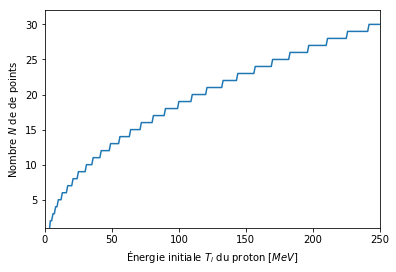

In [27]:
plt.plot(b,n)
plt.xlabel('Énergie initiale $T_i$ du proton $[MeV]$')
plt.ylabel('Nombre $N$ de de points')
plt.xlim([0,250])
plt.ylim([1,32])
plt.show()

Avec la figure ci dessus, on remarque que le nombre $N$ de points nécessaires afin d'obtenir une précision de $10^{-9}\ cm$ sur la portée du proton augmente avec l'énergie du proton. Cela s'explique par le fait qu'une augmentation d'énergie implique une augmentation du domaine d'intégration. Il devient donc nécessaire d'avoir plus de points pour avoir un résultat précis. Bref, pour l'énergie maximale de $250\ MeV$, 31 points sont nécessaires afin d'avoir la précision attendue.

Considérons maintenant une distribution de 10 000 protons. Celle-ci aura une énergie moyenne de $240\ MeV$ ainsi qu'un écart type de $3\ MeV$. On cherche ici à calculer la portée des protons en temps quasi-réel, ce qui implique que la rapidité de l'intégration doit être grande. Pour ce faire, il est nécessaire de trouver un nombre de points offrant un compromis entre rapidité et exactitude, autant pour la quadrature Gaussienne que pour l'intégration par trapèze. Puisque nous faisons un histogramme, l'erreur d'approximation fera changer certains protons de catégorie ("\textit{bin}") s'ils sont moins distants du bord du "bin" quel l'erreur sur leur portée. On peut alors simplement calculer la probabilité qu'un proton change de "bin" en fonction de l'erreur d'approximation pour trouver quelle erreur d'approximation est acceptable, donc quels paramètres utiliser dans nos fonctions d'intégration. Cette probabilité s'exprime, en pourcentage, comme:

\begin{align}
\%_{wrong\ bin} = \frac{Error}{bin\ width}\cdot 100  \label{err}
\end{align}

Comme nous connaissons aussi le nombre de protons simulés, on voudra utiliser un pourcentage assurant qu'en moyenne un seul proton change de "bin" à cause de l'erreur d'approximation sur sa portée. 

À partir de cette idée, nous avons calculé le nombre de points nécessaire afin de respecter ce critère. Pour la quadrature gaussienne, nous avons besoin de 15 points tandis que pour la méthode des trapèzes, 495 points (i.e. 494 trapèzes) sont nécessaires. Bref, une augmentation de ces nombre causerait un raffinement plus petit que la largeur des bins considérés causant ainsi une augmentation de résolution menant à aucun changement notable dans la distribution des portées. 

In [29]:
energie = np.random.normal(240, 3, 10000) # Obtention de la distribution d'énergie

In [148]:
def translate_xw(x, w, a, b):
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def gauss_quad(N, b, a=3):
    res = []
    
    x, w = gaussxw(N)
    
    for b_i in b:
        x_i, w_i = translate_xw(x, w, a, b_i)
        
        s = sum(w_i/get_s_col(r_e, n_e_eau, x_i, I_eau))
            
        res.append(s)
        
    return res   

def calculate_points_number(func, typ, bin_width, wanted_fraction, max_energy = 220,\
                                               points_number = 1, error = 1337, prev = 0):
    wanted_error = wanted_fraction* bin_width
    while error > wanted_error:
        value_N = func(points_number, [max_energy])[0]
        value_2N = func(2*points_number, [max_energy])[0]
        if typ == 'trapz':
            error = abs(value_N - value_2N)/3
        if typ == 'gauss':
            error = abs(value_N - value_2N)
        
        points_number += 1
    return points_number, error

number, error = calculate_points_number(gauss_quad, 'gauss', 0.06, 1e-4, 220)

print('Nombre de points nécessaire pour une erreur de 0.01% : ', number)

start = timer()
portee_quad = gauss_quad(15, energie)
end = timer()

time_quad = np.round(end-start, 2)

print("Temps requis pour calculer la portée de 10 000 protons : ", time_quad, "secondes")

Nombre de points nécessaire pour une erreur de 0.01% :  15
Temps requis pour calculer la portée de 10 000 protons :  0.61 secondes


In [145]:
def normal_pdf(x, mu, sigma):
    return (np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi)))

def get_fitting_data(portee):
    
    # Moyenne et écart type de la distribution de portée
    mu = np.mean(portee)
    sigma = np.std(portee)

    # Création de la gaussienne
    x_fit = np.linspace(min(portee), max(portee), 10000)
    y = normal_pdf(x_fit, mu, sigma)

    # Hauteur, position des centres et largeur des bins
    n, x = np.histogram(portee, bins=100)
    wid = (x[1]-x[0])*np.ones(len(x))

    # Normalisation
    n = n/(sum(n)*wid[0])
    
    return mu, sigma, x_fit, y, n, x, wid


mu_quad, sigma_quad, x_fit_quad, y_quad, n_quad, x_quad, wid_quad = get_fitting_data(portee_quad)



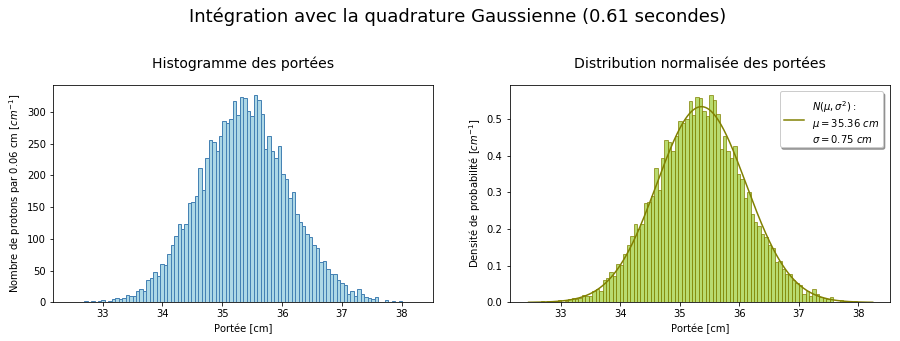

In [149]:
def plot_histo(mu, sigma, x_fit, y, n, x, wid, portee, time, typ):
    fig, ax = plt.subplots(1,2, figsize=(15,4))

    ax[0].hist(portee, 100, color='lightblue', edgecolor='steelblue')
    ax[0].set_title('Histogramme des portées', y=1.05, fontsize=14)
    ax[0].set_ylabel('Nombre de protons par 0.06 cm $[cm^{-1}]$')
    ax[0].set_xlabel('Portée [cm]')

    ax[1].bar(x[:-1], n, wid[:-1], alpha = 0.7, color='yellowgreen', edgecolor='olive')
    ax[1].plot(x_fit, y, color='olive',\
               label="$N(\mu, \sigma^2) : $\n$\mu = {}\ cm $\n$\sigma = {}\ cm$".format(np.round(mu, 2), np.round(sigma, 2)))

    ax[1].set_xlabel('Portée [cm]')
    ax[1].set_ylabel('Densité de probabilité $[cm^{-1}]$')
    ax[1].set_title('Distribution normalisée des portées', y=1.05, fontsize=14)
    ax[1].legend(bbox_to_anchor=(0.71, 0.97), loc=2, borderaxespad=0., fancybox=True, shadow=True)
    
    if typ == 'trapz':
        plt.suptitle('Intégration avec la méthode des trapèzes ({} secondes)'.format(time), fontsize=18, y=1.15)
    if typ == 'gauss':
        plt.suptitle('Intégration avec la quadrature Gaussienne ({} secondes)'.format(time), fontsize=18, y=1.15)
    if typ == 'sp':
        plt.suptitle('Intégration avec la méthode quad de Scipy ({} secondes)'.format(time), fontsize=18, y=1.15)
    
    plt.show()
    
    
plot_histo(mu_quad, sigma_quad, x_fit_quad, y_quad, n_quad, x_quad, wid_quad, portee_quad, time_quad, 'gauss')

Bref, en considérant 15 points pour l'intégration avec la quadrature gaussienne, on obtient un temps de calcul de 0.9 secondes pour 10 000 protons, ce qui correspond à un traitement de 11 111 protons par seconde. À partir de la largeur des catégories de la distribution de portée et de \eqref{err}, nous avons commis une erreur de l'ordre de $10^{-6}\ cm$ sur la portée de chacun des protons, portée pour laquelle, en moyenne seulement 1 protons se voit être mal représenté.

## 10.

On veut maintenant calculer la portée des protons en temps quasi-réel, mais avec la méthode des trapèzes. Sans considérer l'erreur d'intégration, on peut exprimer celle-ci mathématiquement comme,

\begin{align}
S(a,b) = h\left[\frac{1}{2}f(a) + \frac{1}{2}f(b) + \sum_{k=1}^{N-1} f(a+kh)\right]
\end{align}

Comme mentionné plus tôt, on utilisera 494 trapèzes lors de notre intégration afin d'avoir en moyenne un seul proton se retrouvant dans la mauvaise catégorie, ce qui correspond à $0.01 \%$ des protons considérés. 

In [121]:
def trapz_integration(N, b, a=3):
    res = []
    for b_i in b:
        # Initialisation du domaine d'intégration
        points = np.linspace(a, b_i, N+1)
        h = (b_i-3)/N # Largeur des trapèzes
    
        f = 1/get_s_col(r_e, n_e_eau, points, I_eau) 
        s = h*(0.5*f[0] + sum(f[1: -1]) + 0.5*f[-1]) 
        
        res.append(s)  
    return res

number, error = calculate_points_number(trapz_integration, 'trapz', 0.06, 1e-4, 220)

print('Nombre de points nécessaire pour une erreur de 0.01% : ', number)

start_trapz = timer() # Début chronométrage
portee_trapz = trapz_integration(494, energie)
end_trapz = timer() # Fin chronométrage

time_trapz = np.round(end_trapz - start_trapz, 2)

print("Temps requis pour calculer la portée de 10 000 protons : ", time_trapz, "secondes")

Nombre de points nécessaire pour une erreur de 0.01% :  494
Temps requis pour calculer la portée de 10 000 protons :  2.01 secondes


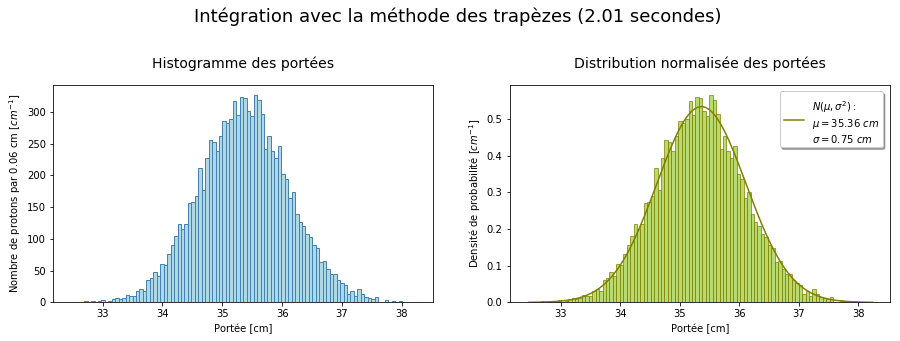

In [150]:
mu_trapz, sigma_trapz, x_fit_trapz, y_trapz, n_trapz, x_trapz, wid_trapz = get_fitting_data(portee_trapz)
plot_histo(mu_trapz, sigma_trapz, x_fit_trapz, y_trapz, n_trapz, x_trapz, wid_trapz, portee_trapz, time_trapz, 'trapz')

## 11.

La librairie Scipy en est une remplie d'outils très utiles pour le calcul scientifique en python. Parmis ces nombreuses fonctions disponible, la fonction \textit{quad} du module \textit{integrate} permet d'intégrer une fonction unidimensionelle quelconque de façon numérique sur un intervalle fini ou infini. Ce dernier utilise des techniques originant de la librairie Fortran QUADPACK.

Cette librairie existe dans une version stable depuis 1987 et se trouve dans le domaine publique. Ses différents algorithmes d'intégration sont recconaissable à leur nom, une combinaison de 3-4 lettres commançant par Q. Ce nom représente le type d'intégration, et on peut voir les possibilités dans la figure suivante.
![image](https://raw.githubusercontent.com/eliedl/Physique_numerique/master/QUADPACK.PNG)
Source: https://en.wikipedia.org/wiki/QUADPACK


In [133]:
def scipy_integration(x):
    res = []
    for x_i in x:
        s = integrate.quad(lambda T: 1/get_s_col(r_e, n_e_eau, T, I_eau), 3, x_i, epsabs=1e-06)[0]
        res.append(s)
    
    return res

start_sc = timer()

portee_sp = scipy_integration(energie)

end_sc = timer()

time_sc = np.round(end_sc - start_sc, 2)

print("Temps requis pour calculer la portée de 10 000 protons : ", time_sc, "secondes")

Temps requis pour calculer la portée de 10 000 protons :  12.77 secondes


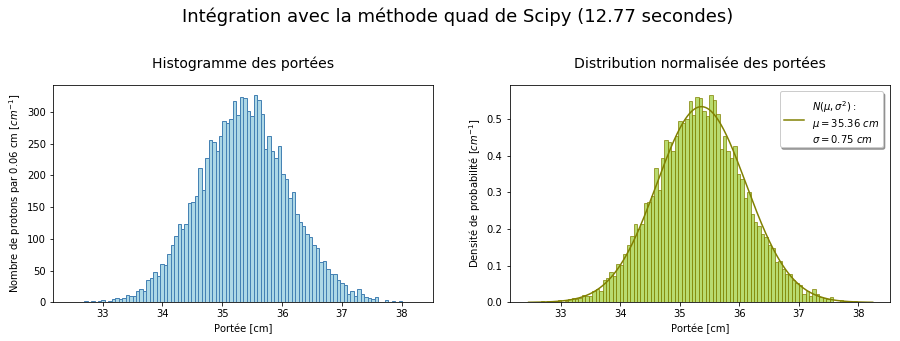

In [151]:
mu_sp, sigma_sp, x_fit_sp, y_sp, n_sp, x_sp, wid_sp = get_fitting_data(portee_sp)
plot_histo(mu_sp, sigma_sp, x_fit_sp, y_sp, n_sp, x_sp, wid_sp, portee_sp, time_sc, 'sp')

## 12. 

## 17.


# References

(<a id="cit-newhauser2015physics" href="#call-newhauser2015physics">Newhauser and Zhang, 2015</a>) Newhauser Wayne D and Zhang Rui, ``_The physics of proton therapy_'', Physics in Medicine & Biology, vol. 60, number 8, pp. R155,  2015.

